<font size="4" style="color:red;"> **IMPORTANT: ** Only modify cells which have the following comment</font>

```python
# modify this cell
```

<font style="color:red;"> Do not add any new cells when submitting homework. For Docker users, to test out new code, use the coding **scratchpad** by clicking the triangular icon in the bottom right corner of the screen. (**hotkey:** control-B)  </font>



# 1. Probability

In this excercise you will write code to estimate the probability that $n$ flips of a fair coin will result in number of `"heads"` between $k_1$ and $k_2$.

You should write the body of two functions:
1. <code><font color="blue">seq_sum</font>(n)</code>: generates a random sequence of coin flips and counts the number of heads.
2. <code><font color="blue">estimate_prob</font>(n,k1,k2,m)</code>: Using calls to `seq_sum`, estimate the probability of the number of heads being between $k_1$ and $k_2$. 


### Notebook Setup:

The folowing magic command downloads many python packages like *numpy* and allows the notebooks to plot graphs with *matplotlib*. 

<font color="red">**DO NOT**</font> import other packages. You already have all the packages you need.


In [21]:
%pylab inline
import numpy as np

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


Specifically, you can now use `np.random.rand(x)` which for some $x \in N$ generates $x$ random numbers. You **will** use this command in your homework.

In [22]:
np.random.rand()

0.9127888948400401

In [23]:
np.random.rand(4)

array([0.09784824, 0.42268349, 0.61592022, 0.36966591])

##  1.1 Exercise 1:

Write a function, <code><font color ="blue">seq_sum</font>(n)</code>, which generates $n$ random coin flips from a fair coin and then returns the number of heads. A fair coin is defined to be a coin where $P($heads$)=\frac{1}{2}$ 

The output type should be a numpy integer, **hint:** use `np.random.rand()` 

<font  style="color:blue"> * **Code:** *</font>
```python
x = seq_sum(100)
print x
print [seq_sum(2) for x in range(20)]
```


<font  style="color:magenta"> * **Output:** *</font>
```
49
[0, 1, 1, 1, 1, 2, 1, 2, 1, 1, 0, 0, 2, 1, 1, 1, 0, 0, 1, 1]
```

* Write your code for seq_sum in the cell below

In [24]:
# modify this cell

def seq_sum(n):
    """ input: n, generate a sequence of n random coin flips
        output: return the number of heads 
        Hint: For simplicity, use 1,0 to represent head,tails
    """
    #Coin flip.1 represents heads and 0 represents tails
    flips = (random.rand(n)>0.5)
    
    #Get the total number of heads
    total = sum(flips)
    
    return total


* if the following cell runs without error you receive some points.

In [25]:
# checking function 

x = seq_sum(100)
print(x)
assert np.unique([seq_sum(2) for x in  range(0,200)]).tolist() == [0, 1, 2]

#
# AUTOGRADER TEST - DO NOT REMOVE
#


49


## 1.2 Exercise 2:

Write a function, <code><font color="blue">estimate_prob</font>(n,k1,k2,m)</code>, that uses <code><font color="blue">seq_sum</font>(n)</code> to estimate the following probability:

$$ P(\; k_1 <= \text{number of heads in $n$ flips} < k_2 ) $$

The function should estimate the probability by running $m$ different trials of <code><font color="blue">seq_sum</font>(n)</code>, probably using a *`for`* loop.

In order to receive full credit **estimate_prob** <font color="red">MUST</font> call **seq_sum** (aka: seq_sum is located inside the **estimate_prob** function)

<font  style="color:blue"> * **Code:** *</font>
```python
x = estimate_prob(100,45,55,1000)
print(x)
print type(x)
```

<font  style="color:magenta"> * **Output:** *</font>
```
0.686
<type 'float'>
```

In [26]:
# Modify this cell

def estimate_prob(n,k1,k2,m):
    """Estimate the probability that n flips of a fair coin result in k1 to k2 heads
         n: the number of coin flips (length of the sequence)
         k1,k2: the trial is successful if the number of heads is 
                between k1 and k2-1
         m: the number of trials (number of sequences of length n)
         
         output: the estimated probability 
         """
    count = 0
    for i in range (m):
        if k1 <= seq_sum(n) < k2 :
            count += 1 
    return count/m


In [27]:
# this is a small sanity check
# the true check for this function is further down

x = estimate_prob(100,45,55,1000)
print(x)
assert 'float' in str(type(x))

0.677


In [28]:
### Estimate vs. True Probability

We can now check how to see how close these estimates are to the true probabilities.

SyntaxError: invalid syntax (4116502671.py, line 3)

In [29]:
### Helper Functions

These helper functions are used to calculate the actual probabilities. They are used to test your code.

It is not required that you understand how they work.

SyntaxError: invalid syntax (3840601788.py, line 3)

In [30]:
def calc_prob(n,k1,k2):
    """Calculate the probability using a normal approximation"""
    n=float(n);k1=float(k1);k2=float(k2)
    z1=(k1-0.5*n)/(sqrt(n)/2)
    z2=(k2-0.5*n)/(sqrt(n)/2)
    return (erf(z2/sqrt(2))-erf(z1/sqrt(2)))/2

from math import erf,sqrt
def evaluate(n,q1,q2,m,r=100):
    """Run calc_range many times and test whether the estimates are consistent with calc_prob"""
    k1=int(q1*n)
    k2=int(q2*n)
    p=calc_prob(n,k1,k2)
    std=sqrt(p*(1-p)/m)
    print('computed prob=%5.3f, std=%5.3f'%(p,std))

    L=[estimate_prob(n,k1,k2,m) for i in range(r)]
    med=np.median(L)
    print('ran estimator %d times, with parameters n=%d,k1=%d,k2=%d,m=%d'%(r,n,k1,k2,m))
    print('median of estimates=%5.3f, error of median estimator=%5.3f, std= %f5.3'%(med,med-p,std))
    return L,med,p,std,abs((med-p)/std)

In [31]:
def test_report_assert(n,q1,q2,m,r=100):
    k1=int(q1*n)
    k2=int(q2*n)
    L,med,p,std,norm_err=evaluate(n,q1,q2,m,r=100)
    hist(L);
    plot([p,p],plt.ylim(),'r',label='true prob')
    plot([med,med],plt.ylim(),'k',label='median of %d estimates'%r)
    mid_y=mean(plt.ylim())
    plot([p-std,p+std],[mid_y,mid_y],'g',label='+-std')
    legend();
    print('normalized error of median=',norm_err,'should be <1.0')
    title('r=%d,n=%d,k1=%d,k2=%d,m=%d,\nnorm_err=%4.3f'%(r,n,k1,k2,m,norm_err))
    assert norm_err<1.0

### Testing your Functions

* We now test your functions. The graphs below show how close your estimated probability is to the true probability for various values of $k_1$ and $k_2$. You can see that your answer is never exactly the correct probability. 
* For full credit, the code below must run without error.

#### test no. 1
computed prob=0.954, std=0.021
ran estimator 100 times, with parameters n=100,k1=40,k2=60,m=100
median of estimates=0.950, error of median estimator=-0.004, std= 0.0208405.3
normalized error of median= 0.21591965634481614 should be <1.0
#### test no. 2
computed prob=0.159, std=0.037
ran estimator 100 times, with parameters n=100,k1=55,k2=100,m=100
median of estimates=0.175, error of median estimator=0.016, std= 0.0365355.3
normalized error of median= 0.447367010066922 should be <1.0
#### test no. 3
computed prob=0.146, std=0.035
ran estimator 100 times, with parameters n=100,k1=47,k2=49,m=100
median of estimates=0.140, error of median estimator=-0.006, std= 0.0353595.3
normalized error of median= 0.1834639088948734 should be <1.0
#### test no. 4
computed prob=1.000, std=0.000
ran estimator 100 times, with parameters n=1000,k1=400,k2=600,m=100
median of estimates=1.000, error of median estimator=0.000, std= 0.0000025.3
normalized error of median= 0.0001593621193426113 sh

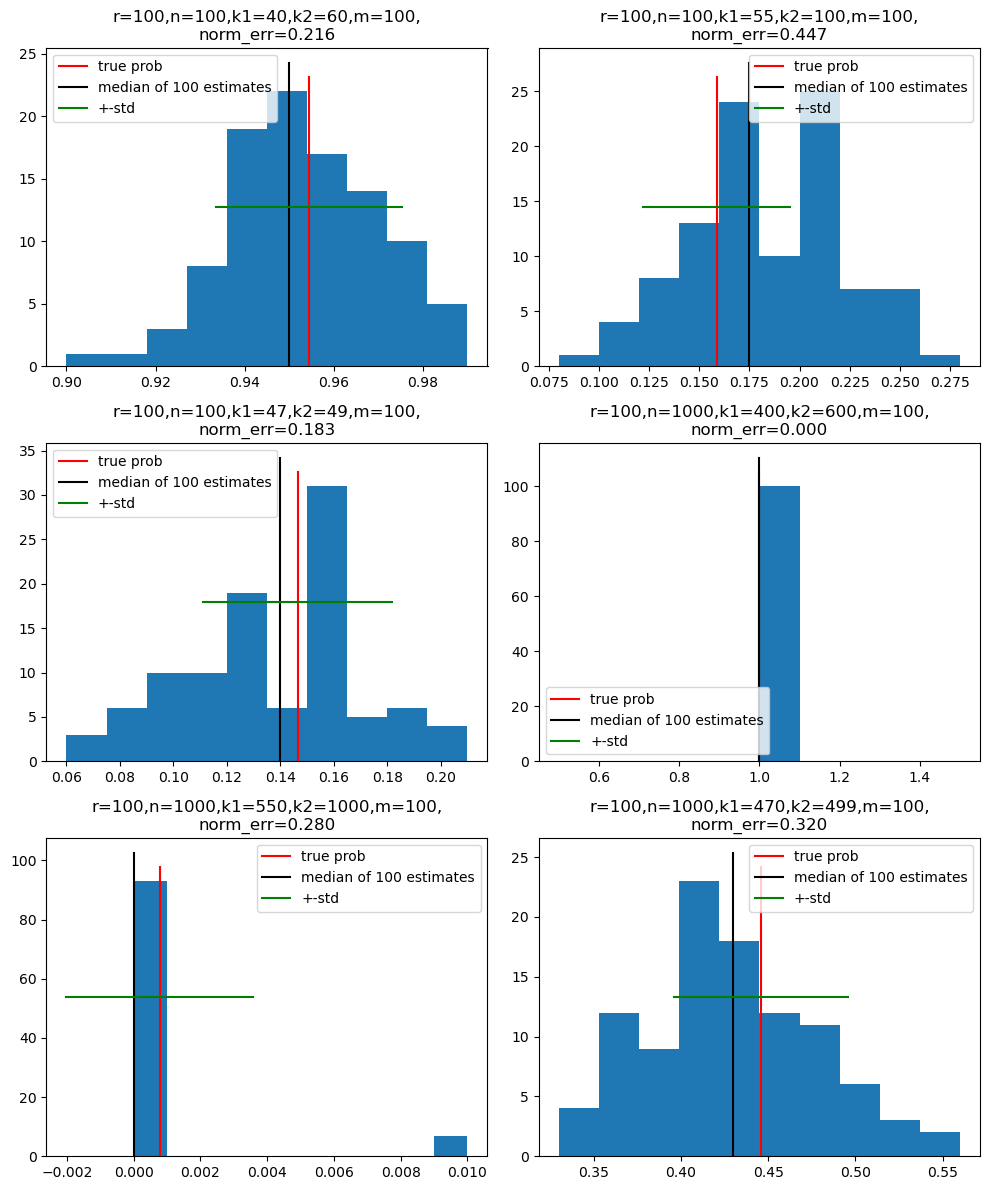

In [32]:
# checking functions

m=100
i=1
figure(figsize=[10,12])
for n in [100,1000]:
    for q1,q2 in [(0.4,0.6),(0.55,1.00),(0.47,0.499)]:
        fig=subplot(3,2,i)
        print('#### test no.',i)
        i+=1
        test_report_assert(n,q1,q2,m,r=100)
tight_layout()

In [33]:
# checking functions 

def seq_sum(n):
    #Log.append(n)
    s=sum(random.rand(n)>0.5)
    Log.append((n,s))
    return s

n,k1,k2,m = 100,45,50,1000
for r in range(10):
    Log=[]
    a=estimate_prob(n,k1,k2,m)
    b=float(sum([(s>=k1 and s<k2) for n,s in Log]))/m
    n_correct=sum(nn==100 for nn,s in Log)
    assert a==b, "estimate is incorrect. should be %4f, instead is %4f"%(b,a)
    assert m==len(Log), 'should call seq_sum %d times, called it %d times'%(m,len(Log))
    assert m==n_correct, 'the parameter n should be %d but sometimes it was not.'%n
    
print("all good!")

all good!


C:\Users\24804\AppData\Local\Temp\ipykernel_9552\1765003271.py:14: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  n_correct=sum(nn==100 for nn,s in Log)


# 2. Sets

## 2.1 Import Stuff

Notice that we do not import *numpy* or *scipy* neither of these packages are need for this homework. For our solutions, the only command we needed to import was `itertools.product()`

In [34]:
import itertools
from itertools import product

Read the notebook on sets before attempting these exercises

De Morgan's first law states the following for any two sets $A$ and $B$
$$(A\cup B)^c = A^c\cap B^c$$

In the following two exercises we calculate $(A\cup B)^c$ in two different ways. Both functions must take $A$, $B$ and the universal set $U$ as their inputs.

## 2.2 Exercise 1


Write the function **complement_of_union** that first determines $A\cup B$ and then evaluates the complement of this set. Output the tuple: $\begin{pmatrix}A\cup B,\, (A\cup B)^c\end{pmatrix}$.



<font  style="color:blue"> **Code**</font>
```python
A = {1, 2, 3}
B = {3, -6, 2, 0}
U = {-10, -9, -8, -7, -6, 0, 1, 2, 3, 4}
complement_of_union(A, B, U)
```

<font  style="color:magenta"> **Output**</font>
```
({-6, 0, 1, 2, 3}, {-10, -9, -8, -7, 4})
```


In [35]:
# modify this cell

def complement_of_union(A, B, U):
    # inputs: A, B and U are of type 'set'
    # output: a tuple of the type (set, set)
    
    #Get the concatenation of A and B
    union = A.union(B)
    
    #Evaluates the complement of this set
    complement = U.difference(union)
    
    return (union,complement)
    


In [36]:
# Check Function

A = {1, 2, 3, 4, 5}
B = {0, 2, -6, 5, 8, 9}
U = A|B|{-3, 7, 10, -4}
assert( complement_of_union(A, B, U) == ({-6, 0, 1, 2, 3, 4, 5, 8, 9}, {-4, -3, 7, 10})  )

#
# AUTOGRADER TEST - DO NOT REMOVE
#


## 2.3 Exercsise 2

Write the function **intersection_of_complements** that first determines $A^c$ and $B^c$ and then evaluates the intersection of their complements. Output the tuple: $\begin{pmatrix}A^c, \,  A^c\cap B^c\end{pmatrix}$

<font  style="color:blue"> **Code**</font>
```python
A = {1, 2, 3}
B = {3, -6, 2, 0}
U = {-10, -9, -8, -7, -6, 0, 1, 2, 3, 4}
intersection_of_complements(A, B, U)
```

<font  style="color:magenta"> **Output**</font>
```
({-10, -9, -8, -7, -6, 0, 4}, {-10, -9, -8, -7, 4})
```


In [37]:
# modify this cell

def intersection_of_complements(A, B, U):
    # inputs: A, B and U are of type 'set'
    # output: a tuple of the form (set, set)
    
    # Calculate the complement of set A and B
    complement_A = U-A
    
    complement_B = U-B
    
    #Evaluates the intersection of their complements of A and B
    intersection = complement_A & complement_B
    
    #Return a tuple containing the complement of A and the intersection
    return(complement_A,intersection)


In [38]:
# Check Function

A = {1, 2, 3, 4, 5}
B = {0, 2, -6, 5, 8, 9}
U = A|B|{-3, 7, 10, -4}
assert(  intersection_of_complements(A, B, U) == ({-6, -4, -3, 0, 7, 8, 9, 10}, {-4, -3, 7, 10})  )

#
# AUTOGRADER TEST - DO NOT REMOVE
#


## 2.4 Exercise 3

<img style="float: right;width:300px;height:200px" src="figs/Venn2.jpg">
The inclusion-exclusion principle states that for two sets $A$ and $B$,

$$|A\cup B|=|A|+|B|-|A\cap B|.$$

Write the following functions to determine $|A\cup B|$ in two different ways.

A function **union** that determines first $A\cup B$ and then evaluates the union's size.
Output the ordered pair $(A\cup B, |A\cup B|)$.

<font  style="color:blue"> * **Sample run** *</font>
```python
A = {1, 2, 3}
B = {3, -6, 2, 0}
print union(A, B)
```

<font  style="color:magenta"> * **Expected Output** *</font>
```
({-6, 0, 1, 2, 3}, 5)
```

In [39]:
# modify this cell

### The first way
def union(A, B):
    # inputs: A and B are of type 'set'
    # output: a tuple of the type (set, set_length)
    
    # Calculate the union of sets A and B
    union = A|B
    
    #Evaluates the union's size
    length=len(union)
    
    return(union,length)

### The second way 
def union2(A, B):
    # inputs: A and B are of type 'set'
    # output: a tuple of the type (set, set_length)
    
    
    # Calculate the union of sets A and B
    union2 = A|B
    
    #Evaluates the union's size
    length2 = len(A)+len(B)-len(A&B)
    
    return(union2,length2)
    


In [40]:
A = {1,4,-3, "bob"}
B = {2,1,-3,"jill"}
assert union(A,B) == ({-3, 1, 2, 4, 'bob', 'jill'}, 6)

#
# AUTOGRADER TEST - DO NOT REMOVE
#


## 2.5 Exercise 4

A function **inclusion_exclusion** that first deterimines $|A|$, $|B|$, $A\cap B$, and $|A\cap B|$, and then uses the inclusion-exclusion formula to determine $|A\cup B|$. 
Output the tuple $(|A|, |B|, |A\cap B|, |A\cup B|)$.

<img style="float: right;width:400px;height:266px" src="figs/Venn3.jpg">

<font  style="color:blue"> * **Sample run:** *</font>
```python
A = {1, 2, 3}
B = {3, -6, 2, 0}
print inclusion_exclusion(A, B)
print "notice: 3 + 4 - 2 == 5"
```

<font  style="color:magenta"> * **Expected Output:** *</font>
```
(3, 4, 2, 5)
notice: 3 + 4 - 2 == 5
```

In [41]:
# modify this cell

def inclusion_exclusion(A, B):
    # inputs: A and B are of type 'set'
    # output: a tuple of four integers
    
    #Evaluates A and B length
    lenA = len(A)
    lenB = len(B)
    
    #Evaluates the intersection and union's size
    len_intersection =  len(A&B)
    len_union = len(A)+len(B)-len(A&B)
    
    return (lenA,lenB,len_intersection,len_union)

In [42]:
# Check Function

A = {1, 2, 3, 4, 5}
B = {0, 2, -6, 5, 8, 9}
assert inclusion_exclusion(A, B) == (5, 6, 2, 9)

#
# AUTOGRADER TEST - DO NOT REMOVE
#


## 2.6 Exercise 5

The inclusion-exclusion principle says that for three sets $A$, $B$ and $C$, 

$$|A\cup B\cup C|=|A|+|B|+|C|-|A\cap B|-|B\cap C|-|C\cap A|+|A\cap B\cap C|$$

We will write the following functions to determine $|A\cup B\cup C|$ in two different ways.

Write function **union3** that first determines $A\cup B\cup C$ and then evaluates the size of this union.
Output the tuple $(A\cup B\cup C, |A\cup B\cup C|)$.

<font  style="color:blue"> * **Sample run:** *</font>
```python
A = {1, 2, 3, 4, 5}
B = {0, 2, -6, 5, 8, 9}
C = {2, 10}
union3(A, B, C)
```


<font  style="color:magenta"> * **Expected Output:** *</font>
```
({-6, 0, 1, 2, 3, 4, 5, 8, 9, 10}, 10)
```

In [43]:
# modify this cell

#The first way
def union3(A, B, C):
    # inputs: A, B and C are of type 'set'
    # output: a tuple of the type (set, set_length)
    
    # Calculate the union of sets A, B and C
    union = A|B|C
    
    #Evaluates the size of this union
    length = len(union)
    
    return (union,length)

#The second way
def union4(A, B, C):
    # inputs: A, B and C are of type 'set'
    # output: a tuple of the type (set, set_length)
    
    # Calculate the union of sets A, B and C
    union = A|B|C
    
    #Evaluates the size of this union
    length = len(A)+len(B)+len(C)-len(A&B)-len(A&C)-len(B&C)+len(A&B&C)
    
    return (union,length)

In [44]:
# check Function
A = {1, 2, 4, 5, 10}
B = {5, 2, -6, 5, 8, 9}
C = {2, 10, 13}
assert union3(A,B,C) == ({-6, 1, 2, 4, 5, 8, 9, 10, 13}, 9)

#
# AUTOGRADER TEST - DO NOT REMOVE
#


## 2.7 Exercise 6

A function **inclusion_exclusion3** that first deterimines the sizes of $A$, $B$, $C$ and their mutual intersections, and then uses the inclusion-exclusion principle to determine the size of the union. Output the tuple $(|A\cap B\cap C|, |A\cup B\cup C|)$. Note that for brevity we are asking you to output the intermediate answer just for $A\cap B\cap C$, but you need to calculate all. 

<font  style="color:blue"> * **Sample run:** *</font>
```python
A = {1, 2, 3, 4, 5}
B = {0, 2, -6, 5, 8, 9}
C = {2, 10}
print inclusion_exclusion3(A, B, C)
```


<font  style="color:magenta"> * **Expected Output:** *</font>
```
(1, 10)
```

In [19]:
# modify this cell

def inclusion_exclusion3(A, B, C):
    # inputs: A, B and C are of type 'set'
    # output: a tuple of two integers
    
    #Evaluates the size of this complement and union
    length_complement = len(A&B&C)
    length_union = len(A|B|C)
    
    return (length_complement,length_union)


In [20]:
# Check Function

A = {1, 2, 4, 5, 10}
B = {5, 2, -6, 5, 8, 9, 10}
C = {2, 10, 13}
assert inclusion_exclusion3(A,B,C) == (2, 9)

#
# AUTOGRADER TEST - DO NOT REMOVE
#
